In [2]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
import xgboost as xgb

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [3]:
# make a list of new column names 
"""cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'Y1', 'Y2']"""

# read in modeling datafile and rename columns 
df = pd.read_csv('data/multiclass_modeling.csv', header=0)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f69,f70,f71,f72,f73,f74,f75,f76,f77,Y
0,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,0,0,9.0,0
1,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,0,0,9.0,0


In [4]:
# Split data into features and targets
X = df.iloc[:, :-1] # Features
Y = df.Y # Target 

# data matrix will be used in cv of xgboost model 
data_dmatrix = xgb.DMatrix(data=X,label=Y)

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the targets 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [6]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# predict target 
Y_pred=xg.predict(X_test)

In [7]:
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

F1 Score: 0.7726303813846935


## CV 

In [11]:
params = {'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", seed=2019)

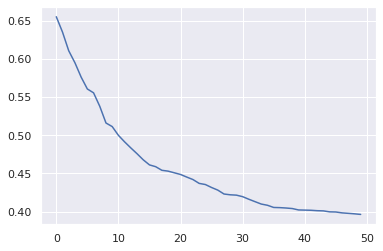

In [19]:
cv_results['test-rmse-mean'].plot()

In [17]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["merror"]
%time xg.fit(X_train, Y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.154046	validation_1-merror:0.157237
[1]	validation_0-merror:0.154046	validation_1-merror:0.157237
[2]	validation_0-merror:0.154046	validation_1-merror:0.157237
[3]	validation_0-merror:0.154046	validation_1-merror:0.157237
[4]	validation_0-merror:0.154046	validation_1-merror:0.157237
[5]	validation_0-merror:0.145034	validation_1-merror:0.148017
[6]	validation_0-merror:0.145034	validation_1-merror:0.148017
[7]	validation_0-merror:0.145034	validation_1-merror:0.148017
[8]	validation_0-merror:0.145034	validation_1-merror:0.148017
[9]	validation_0-merror:0.146252	validation_1-merror:0.148964
[10]	validation_0-merror:0.146252	validation_1-merror:0.148964
[11]	validation_0-merror:0.144303	validation_1-merror:0.147323
[12]	validation_0-merror:0.144303	validation_1-merror:0.147323
[13]	validation_0-merror:0.144303	validation_1-merror:0.147323
[14]	validation_0-merror:0.144303	validation_1-merror:0.147323
[15]	validation_0-merror:0.144303	validation_1-merror:0.147386
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=2019, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)